## Tratamento de dados de séries temporais
### Indexação Temporal (Time Resampling)

In [12]:
import pandas as pd

Vamos começar carregando o dataset *starbucks.csv*

In [13]:
df = pd.read_csv("starbucks.csv" , index_col="Date")

Queremos indexar o dataframe pela data, então devemos criar o dataframe da seguinte forma:

In [14]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

Ao checarmos o índice, vemos que se trata de strings, não de datas.

In [15]:
df = pd.read_csv("starbucks.csv" , index_col="Date" , parse_dates=True)

Para que os índices sejam datas, temos que fazer parse_dates=True

In [16]:
df.index


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

É possível reorganizar um dataframe chamando a função `.resample()`. Assim, pode-se organizar os dados do dataframe de forma a facilitar seu uso na solução de um problema específico.

Ao chamar `.resample()` é necessário passar um parâmetro que serve como regra e fornecer uma função de agregação.

O parâmetro regra descreve como a função de agregação deverá ser utilizada (diariamente, mensalmente, anualmente, etc)<br>
Deve ser passado como um 'offset-alias', conforme tabela a seguir. [[referência](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

A função de agregação é necessária porque, em função do resampling, temos que utilizar alguma regra matemática para unir as linhas (média, soma, contagem, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

Vamos então usar a regra 'A' -- Year end frequency, para obtermos o valor médio do fechamento das ações de cada ano, bem como o volume médio de ações negociadas a cada ano.

In [17]:
df.resample(rule="YE").mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [18]:
df.resample(rule="ME").mean()

,Close,Volume
Date,,
2015-01-31,38.729470,1.336800e+07
2015-02-28,42.862432,7.908719e+06
2015-03-31,44.321836,8.905969e+06
2015-04-30,45.508914,8.540996e+06
2015-05-31,47.488650,6.723716e+06
2015-06-30,49.761627,6.856079e+06
2015-07-31,52.437959,8.087759e+06
2015-08-31,52.797976,1.064881e+07
2015-09-30,53.006186,8.935548e+06


Em alguns casos, as funções de agregação disponíveis podem não ser suficientes para obter o resultado que queremos. Quando isso acontecer, podemos definir nossas próprias funções customizadas e utilizá-las. 

Vamos escrever uma função que retorna a primeira entrada do período especificado. Assim, se especificarmos o período como um ano, a função retornará o primeiro dado de cada ano.

In [19]:
def primeiro_dia(dado):
    if len(dado):
        return dado[0]

In [21]:
df.resample(rule="YE").apply(primeiro_dia)

/tmp/ipykernel_8669/1110946254.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dado[0]


,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


## Exercício 01
Obtenha o preço de fechamento médio por ano e plote um gráfico.

/tmp/ipykernel_8669/3628480544.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df['Close'].resample(rule="A").mean().plot.bar()


<Axes: xlabel='Date'>

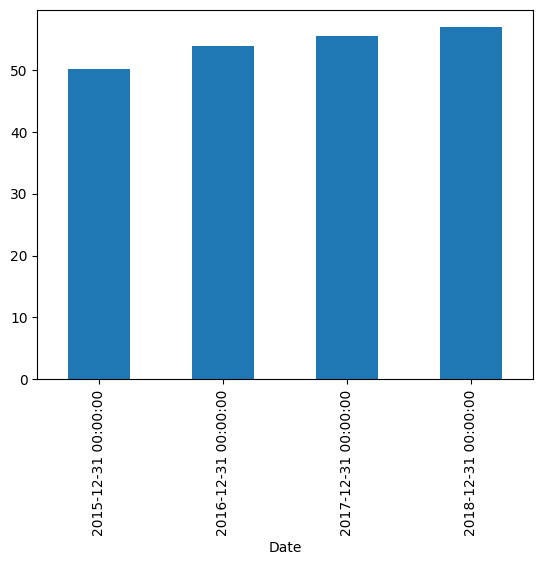

In [25]:
df['Close'].resample(rule="A").mean().plot.bar()

## Exercício 02
Obtenha o preço de fechamento médio por mês e plote um gráfico.

<Axes: xlabel='Date'>

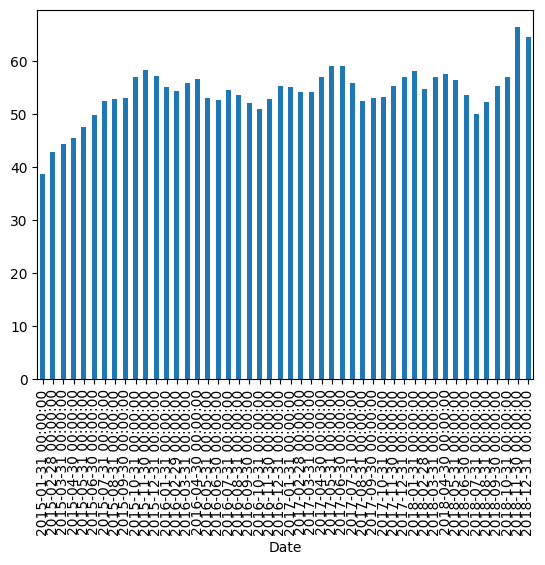

In [31]:
df['Close'].resample(rule="ME").mean().plot.bar()

## Time Shifting (deslocamento temporal)
Podemos deslocar os registros de um dataframe utilizando a função shift. Vamos realizar um deslocamento unitário no dataframe que contém os dados do Starbucks.

In [32]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [33]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [34]:
df.shift(5)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,64.47,15143054.0
2018-12-26,64.92,10523476.0
2018-12-27,64.06,14390146.0


Podemos também fazer um deslocamento reverso. Para tanto, basta utilizar um valor negativo como argumento do shift.

In [35]:
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


Podemos realizar deslocamentos com enfoque temporal utilizando os argumentos opcionais da função shift, a saber periods and freq.

Assim, se desejarmos fazer um deslocamento de um mês, basta fazermos periods=1 e freq='M'.

In [37]:
df.shift(periods=1 , freq="ME")

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


Para maiores informações sobre shifting, visite: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html